**Question 1**

In [ ]:
# Define string variables that should be concatenated

Product_Category = " Office Furniture"
Product_Info = "Mesh Office Chair with Folding Arms and Removable Lumbar Cushion (Black)"

# Concatenate strings using .join() method

newstring = "".join([Product_Category, " ", Product_Info])

# Print result

print(newstring)

 Office Furniture Mesh Office Chair with Folding Arms and Removable Lumbar Cushion (Black)


**Question 2**

Option #1

In [ ]:
# Define reversed customer name variable

reversed_customer_name = "SBOJ EVETS"

# Reverse name 

customer_name = reversed_customer_name[::-1]

# Print result

print(customer_name)

STEVE JOBS


Option #2

In [ ]:
# Define reversed customer name variable

reversed_customer_name = "SBOJ EVETS"

# Reverse name 

customer_name = "".join(reversed(reversed_customer_name))

# Print result

print(customer_name)

STEVE JOBS


**Question 4**

(a)

In [ ]:
def calculate_emi():

  # Ask user for mortgage amount
  
  mortgage_amount = float(input("Input loan/mortgage amount: "))

  # Validate whether mortgage amount input was acceptable

  while mortgage_amount < 100000 or mortgage_amount > 500000:
    print("Enter the allowed amount for the mortgage i.e. between £100000 and £500000")
    mortgage_amount = float(input("Input loan/mortgage amount: "))

  # Ask user for interest rate

  interest_rate = float(input("Input interest rate: "))

  # Validate whether interest rate input was acceptable

  while interest_rate < 0 or interest_rate > 100:
    print("Enter the correct interest rate i.e. between 0 and 100")
    interest_rate = float(input("Input interest rate: "))

  # Ask user for loan tenure

  tenure = input("Input tenure in years (only numeric values): ")

  # Validate whether tenure input was numeric

  while not tenure.isnumeric():
    print("Enter a numeric value for tenure")
    tenure = input("Input tenure in years (only numeric values): ")

  # If input was numeric, convert tenure to float as well

  tenure = float(tenure)

  # Calculate EMI

  numerator = mortgage_amount * ((interest_rate/100/12) * (1 + (interest_rate/100/12)) ** (tenure * 12))
  denominator = ((1 + (interest_rate/100/12)) ** (tenure * 12) - 1)
  emi = numerator/denominator

  print("The monthly installation amount you have to pay for your mortgage is: " + str(round(emi,2)))

(b) Input scenario 1

In [ ]:
calculate_emi()

Input loan/mortgage amount: 550000
Enter the allowed amount for the mortgage i.e. between £100000 and £500000
Input loan/mortgage amount: 500000
Input interest rate: 7
Input tenure in years (only numeric values): 15
The monthly installation amount you have to pay for your mortgage is: 4494.14


(b) Input scenario 2

In [ ]:
calculate_emi()

Input loan/mortgage amount: 450000
Input interest rate: 102
Enter the correct interest rate i.e. between 0 and 100
Input interest rate: 2
Input tenure in years (only numeric values): 15
The monthly installation amount you have to pay for your mortgage is: 2895.79


**Question 5**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import customer data into a Pandas DataFrame

customer_data = pd.read_excel("Customer-Segmentation.xlsx")

i. How many of customers are in the nursing profession?

In [ ]:
# Filter DataFrame to include only those customers with "Nurse" in the job title

nurses_data = customer_data[customer_data["job_title"].str.contains("Nurse")]

# Print out length of the filtered DataFrame

print("There are", len(nurses_data), "nurses among the customers.")

There are 152 nurses among the customers.


ii. What is the gender breakdown for the nursing professionals?

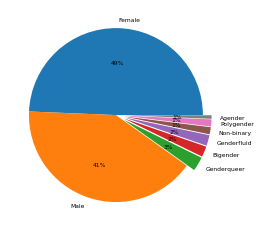

In [ ]:
# Create series with frequencies of the genders of the customers in the nursing profession and order it

nurses_gender_data = nurses_data.groupby("gender").size()
nurses_gender_data = nurses_gender_data.sort_values(ascending=False)

# Find those genders that are less represented and add explosion values accordingly to highlight them

explode_values = []
for freq in nurses_gender_data.values:
  if (freq/sum(nurses_gender_data.values)<0.1):
    explode_values.append(0.1)
  else:
    explode_values.append(0)

# Create pie chart with frequencies of genders, the genders as labels and explode those categories that are hard to see
# Add percentages to the pie chart and show it.

plt.pie(nurses_gender_data.values, labels=nurses_gender_data.index, explode=explode_values, autopct="%.0f%%")
plt.rc('font', size=6)
plt.show()

iii. Which five countries sell the least in terms of the number of customers?

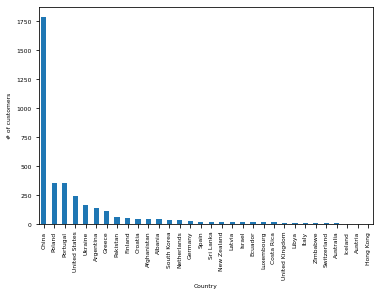

In [ ]:
# Create series with frequencies of customers by country and sort it

country_data = customer_data.groupby("country").size()
country_data = country_data.sort_values(ascending=False)

# Create bar chart/histogram and plot it

country_data.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("# of customers")
plt.show()

iv. Additional key insight: Which languages do customers speak?

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


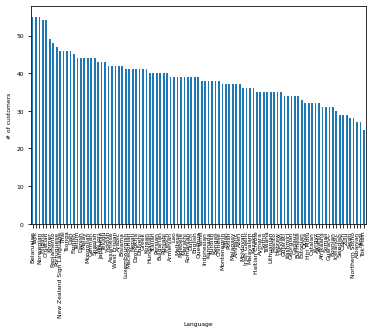

In [ ]:
# Create series with frequencies of languages and sort it

language_data = customer_data.groupby("language").size()
language_data = language_data.sort_values(ascending=False)

# Create bar chart and plot it

language_data.plot(kind="bar")
plt.xlabel("Language")
plt.ylabel("# of customers")
plt.show()

v. Additional key insight: Word cloud of job titles

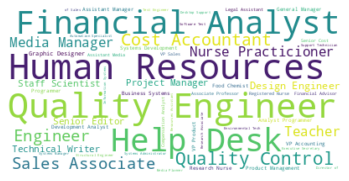

In [ ]:
# Concatenate the job titles into one long string

text = ""

for title in customer_data["job_title"]:
  text = text + " " + title

# Create word cloud but exclude words that indicate rank such as I, II, III, etc.

wc = WordCloud(background_color="white", stopwords=["I", "II", "III", "IV"]).generate(text)

# Show the word cloud but turn axes off 

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

**Appendix A**

In [ ]:
import timeit

# Measure the two lines' execution times and print the results

slicing_time = timeit.timeit("customer_name = 'SBOJ EVETS'[::-1]")
join_reversed_time = timeit.timeit("''.join(reversed('SBOJ EVETS'))")

# Print how much longer join/reversed reversal took

print("In this iteration, join/reversed reversal took", round(join_reversed_time/slicing_time,1), "x as long as slicing reversal.")

In this iteration, join/reversed reversal took 4.0 x as long as slicing reversal.
